In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [46]:
countries = pd.read_csv('datasets/countries.csv')

countries = countries.dropna()

counter = 1
country_list = []

for i in countries.itertuples():
    country_list.append(i[1].strip())

print(country_list)

['Afghanistan', 'Albania', 'Algeria', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas. The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'British Virgin Is.', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo. Dem. Rep.', 'Congo. Repub. of the', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia. The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'I

In [47]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
countries = countries.drop(['Region', 'Country'], axis = 1)

    
    
for index_label, row_series in countries.iterrows():
    countries.at[index_label, 'Country'] = counter
    counter += 1

# print(country_list)
countries
# Create x, where x the 'scores' column's values as floats
x = countries.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data = pd.DataFrame(x_scaled)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.023626,0.067225,0.002855,0.000000,1.000000,1.000000,0.005362,0.223301,0.003342,0.195299,0.004493,0.814759,0.000000,0.904926,0.656056,0.000494,0.000221,0.000178,0.000000
1,0.002716,0.002982,0.007589,0.001447,0.364586,0.119604,0.107239,0.836165,0.079082,0.339559,0.090278,0.617369,0.666667,0.180018,0.102817,0.301691,0.207471,0.606832,0.005618
2,0.025051,0.247286,0.000742,0.000046,0.467650,0.178567,0.147453,0.635922,0.086768,0.051844,0.005106,0.947953,0.000000,0.226750,0.080498,0.131339,0.000618,0.312218,0.011236
3,0.000000,0.000008,0.008053,0.068684,0.720772,0.116557,0.217158,0.939320,0.512141,0.000000,0.000000,1.000000,0.333333,0.158379,0.107208,0.000052,0.000155,0.000598,0.016854
4,0.000042,0.000043,0.009530,0.039671,0.336890,0.106792,0.281501,0.866505,0.612274,0.292706,0.092933,0.659067,0.333333,0.221915,0.108306,0.049415,0.000199,0.778777,0.022472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.019572,0.094693,0.001632,0.000356,0.475596,0.123834,0.115282,0.919903,0.155825,0.047496,0.018791,0.941953,0.333333,0.262891,0.091840,0.000052,0.462449,0.566991,0.977528
175,0.064225,0.034214,0.015716,0.001206,0.466288,0.147158,0.053619,0.882282,0.208844,0.321526,0.121528,0.611219,0.333333,0.220304,0.139407,0.271782,0.000408,0.399239,0.983146
176,0.016319,0.054815,0.002398,0.000413,0.476504,0.368267,0.008043,0.395631,0.041212,0.044759,0.004902,0.954702,0.000000,0.819521,0.215514,0.175553,0.520950,0.411820,0.988764
177,0.008743,0.078139,0.000834,0.000000,0.476504,0.534892,0.008043,0.764563,0.008911,0.113991,0.000613,0.893505,0.333333,0.776013,0.641054,0.000286,0.000276,0.512471,0.994382


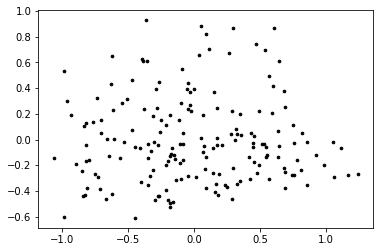

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principals = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principals, columns = ['P1', 'P2'])
f1 = principalDf['P1'].values
f2 = principalDf['P2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [56]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=15)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

In [61]:
data['cluster'] = labels

In [63]:
data['countries'] = country_list

In [70]:
data = data[['countries', 'cluster']]

KeyError: "['cluster'] not in index"